## CUSTOMER SEGMENTATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
import datetime as dt
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/Users/ajithkhan/Downloads/Python projects/Own /From kaggle or Others/Kaggle/Customer segmentation/marketing_campaign.csv')
pd.set_option('display.max_columns', 200)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    04/09/12       58       635         88              546              172   
1    08/03/14       38        11          1                6                2   
2    21/08/13       26       426         49              127              111   
3    10/02/14       26        11          4               20               10   
4    19/01/14       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## Attributes

In [3]:
#Shape
df.shape

(2240, 29)

In [4]:
#Drop the Ids
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'],  axis = 1, inplace=True)

In [5]:
#Conver the birth year to Age 
df['Age'] = 2020 - df['Year_Birth']
df.drop('Year_Birth', axis =1, inplace=True)
age = df.pop('Age')
df.insert(0, 'Age', age) #Keeping age as the 1st column. 
df.head()

Age   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0   63  Graduation         Single  58138.0        0         0    04/09/12   
1   66  Graduation         Single  46344.0        1         1    08/03/14   
2   55  Graduation       Together  71613.0        0         0    21/08/13   
3   36  Graduation       Together  26646.0        1         0    10/02/14   
4   39         PhD        Married  58293.0        1         0    19/01/14   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [6]:
#Conver the customer year with the store to a value 
df["Dt_Customer"] = df["Dt_Customer"].astype('datetime64[ns]')
df['year'] = pd.DatetimeIndex(df['Dt_Customer']).year # To get the years
df['No_of_years'] = 2020 - df['year']

In [7]:
n = df.pop('No_of_years')
df.insert(6, 'No_of_years', n) #Keeping age as the 6st column. 
df.drop(['Dt_Customer', 'year'], axis =1, inplace=True)
df.head()

Age   Education Marital_Status   Income  Kidhome  Teenhome  No_of_years  \
0   63  Graduation         Single  58138.0        0         0            8   
1   66  Graduation         Single  46344.0        1         1            6   
2   55  Graduation       Together  71613.0        0         0            7   
3   36  Graduation       Together  26646.0        1         0            6   
4   39         PhD        Married  58293.0        1         0            6   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [8]:
df['Spent'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
s = df.pop('Spent')
df.insert(14, 'Spent', s)

In [9]:
df["Children"]=df["Kidhome"]+df["Teenhome"]
c = df.pop('Children')
df.insert(6, 'Children', c)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Children             2240 non-null   int64  
 7   No_of_years          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Spent                2240 non-null   i

In [11]:
#Lets convert the int categories of promotion to objects 
df['AcceptedCmp1'] = df['AcceptedCmp1'] .astype('O')
df['AcceptedCmp2'] = df['AcceptedCmp2'] .astype('O')
df['AcceptedCmp3'] = df['AcceptedCmp3'] .astype('O')
df['AcceptedCmp4'] = df['AcceptedCmp4'] .astype('O')
df['AcceptedCmp5'] = df['AcceptedCmp5'] .astype('O')
df['Response'] = df['Response'] .astype('O')
df['Complain'] = df['Complain'] .astype('O')

In [12]:
#For clarity
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                       "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [13]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Children             2240 non-null   int64  
 7   No_of_years          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  Spent                2240 non-null   i

In [14]:
#numerical columns 
num_cols = [fea for fea in df.columns if df[fea].dtypes != 'O']
num_cols

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Children',
 'No_of_years',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'Spent',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [15]:
#categorical columns
cat_cols = [fea for fea in df.columns if df[fea].dtypes == "O"]
cat_cols 

['Education',
 'Marital_Status',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [16]:
#Check the unique values in categorical columns
for i in cat_cols:
    print(df[i].value_counts())
    print('-------------------------------')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
-------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
-------------------------------
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
-------------------------------
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
-------------------------------
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
-------------------------------
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
-------------------------------
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
-------------------------------
0    2219
1      21
Name: Complain, dtype: int64
-------------------------------
0    1906
1     334
Name: Response, dtype: int64
-------------------------------


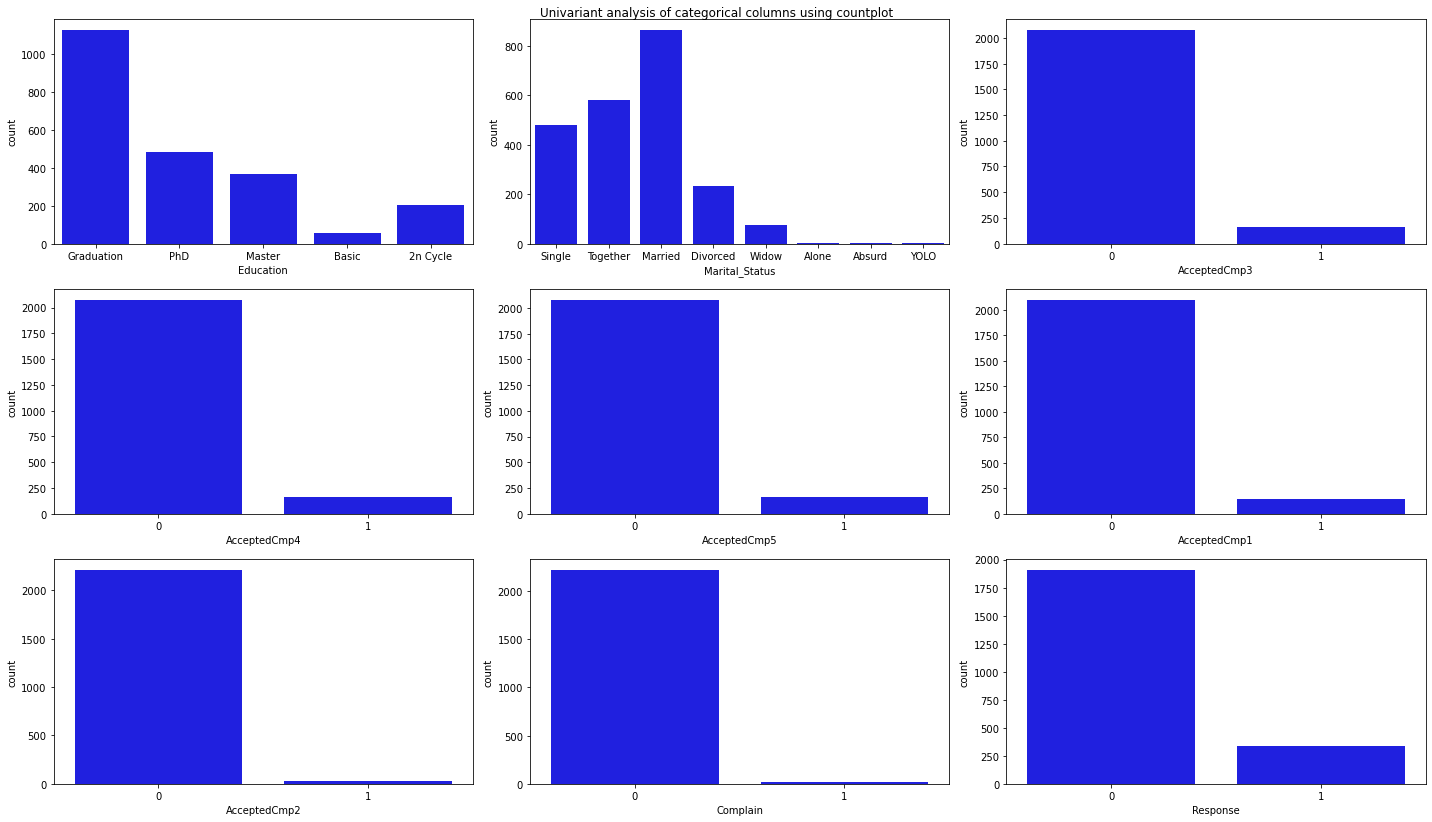

In [17]:
#Univariant analysis of categorical columns using countplot 
plt.figure(figsize=(20,15))
plt.suptitle('Univariant analysis of categorical columns using countplot')
for i in range(0 , len(cat_cols)):
    plt.subplot(4,3,i+1)
    sns.countplot(x= df[cat_cols[i]], data= df, color= 'Blue')
    plt.tight_layout()

#### OBSERVATIONS :

1. The Graduates were the highest among their customers. 
2. The Married and the together were the top most categories. 
3. All the campaignes have almost equal amount of sales 
4. The last campaignes have the highest sale and the 2nd campaigne have the lowest sale. 

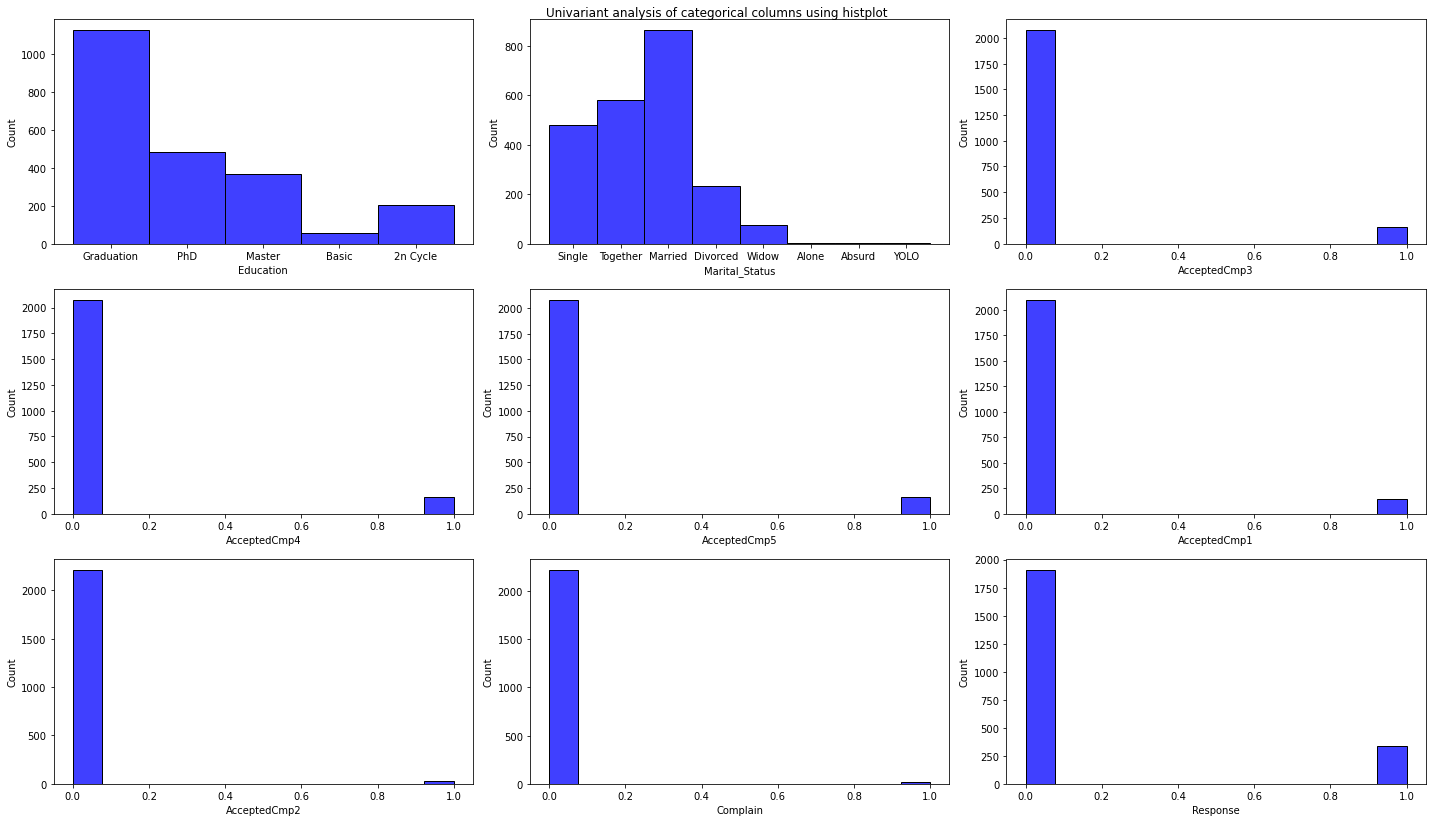

In [18]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariant analysis of categorical columns using histplot')
for i in range(0 , len(cat_cols)):
    plt.subplot(4,3,i+1)
    sns.histplot(x= df[cat_cols[i]], data= df, color= 'Blue')
    plt.tight_layout()

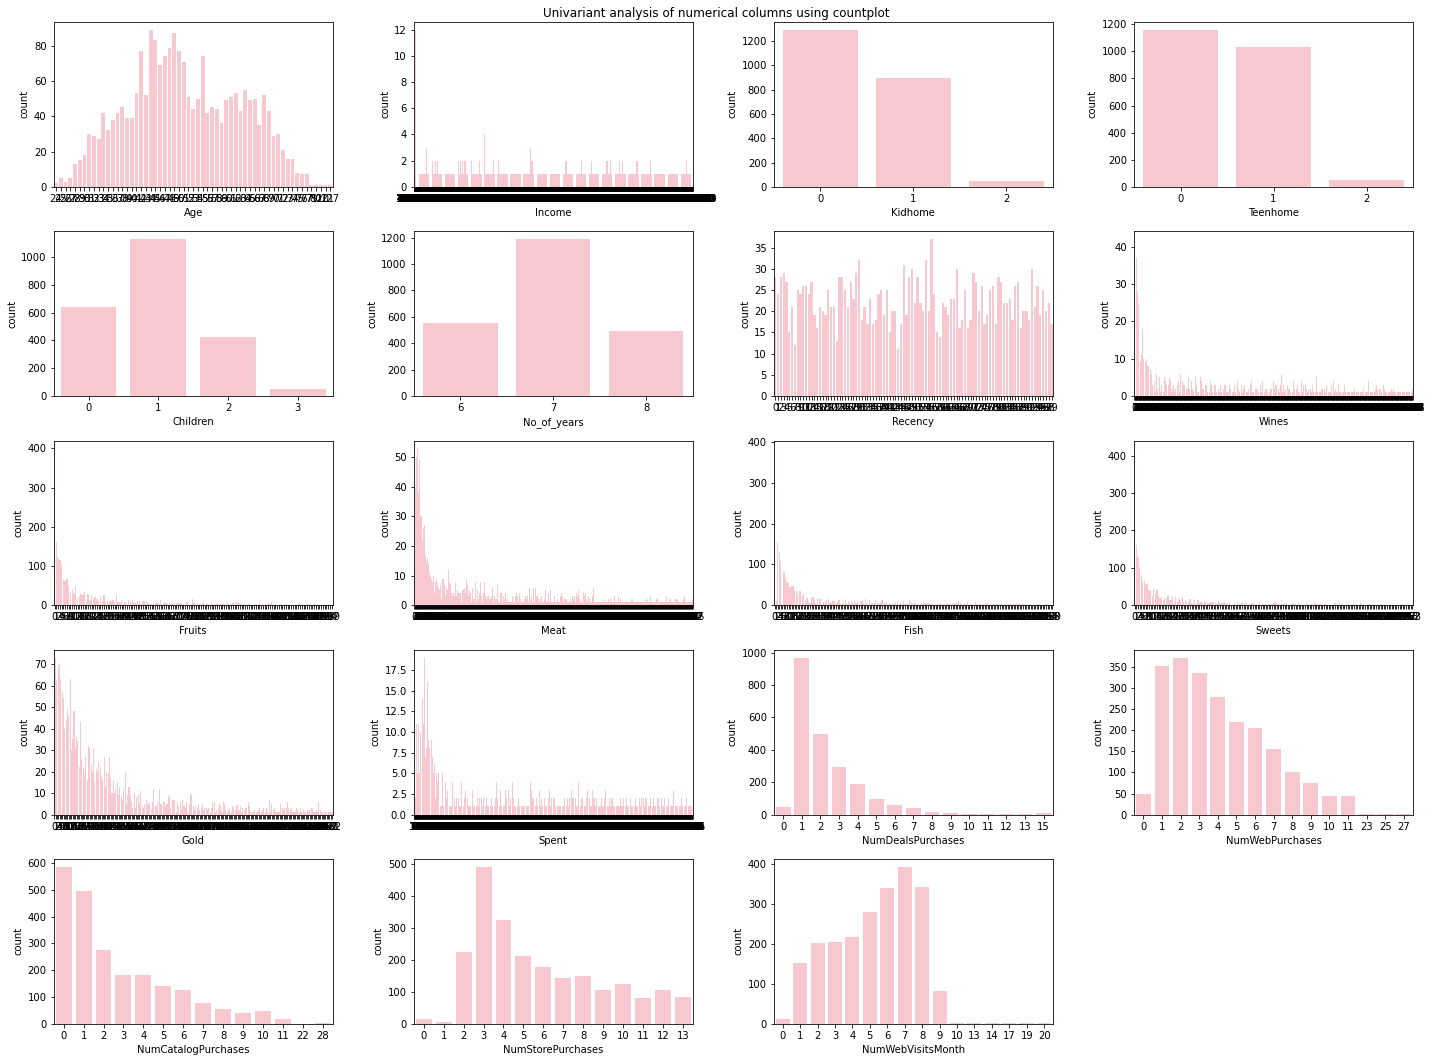

In [19]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariant analysis of numerical columns using countplot')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.countplot(x= df[num_cols[i]], data= df,  color= 'Pink')
    plt.tight_layout()

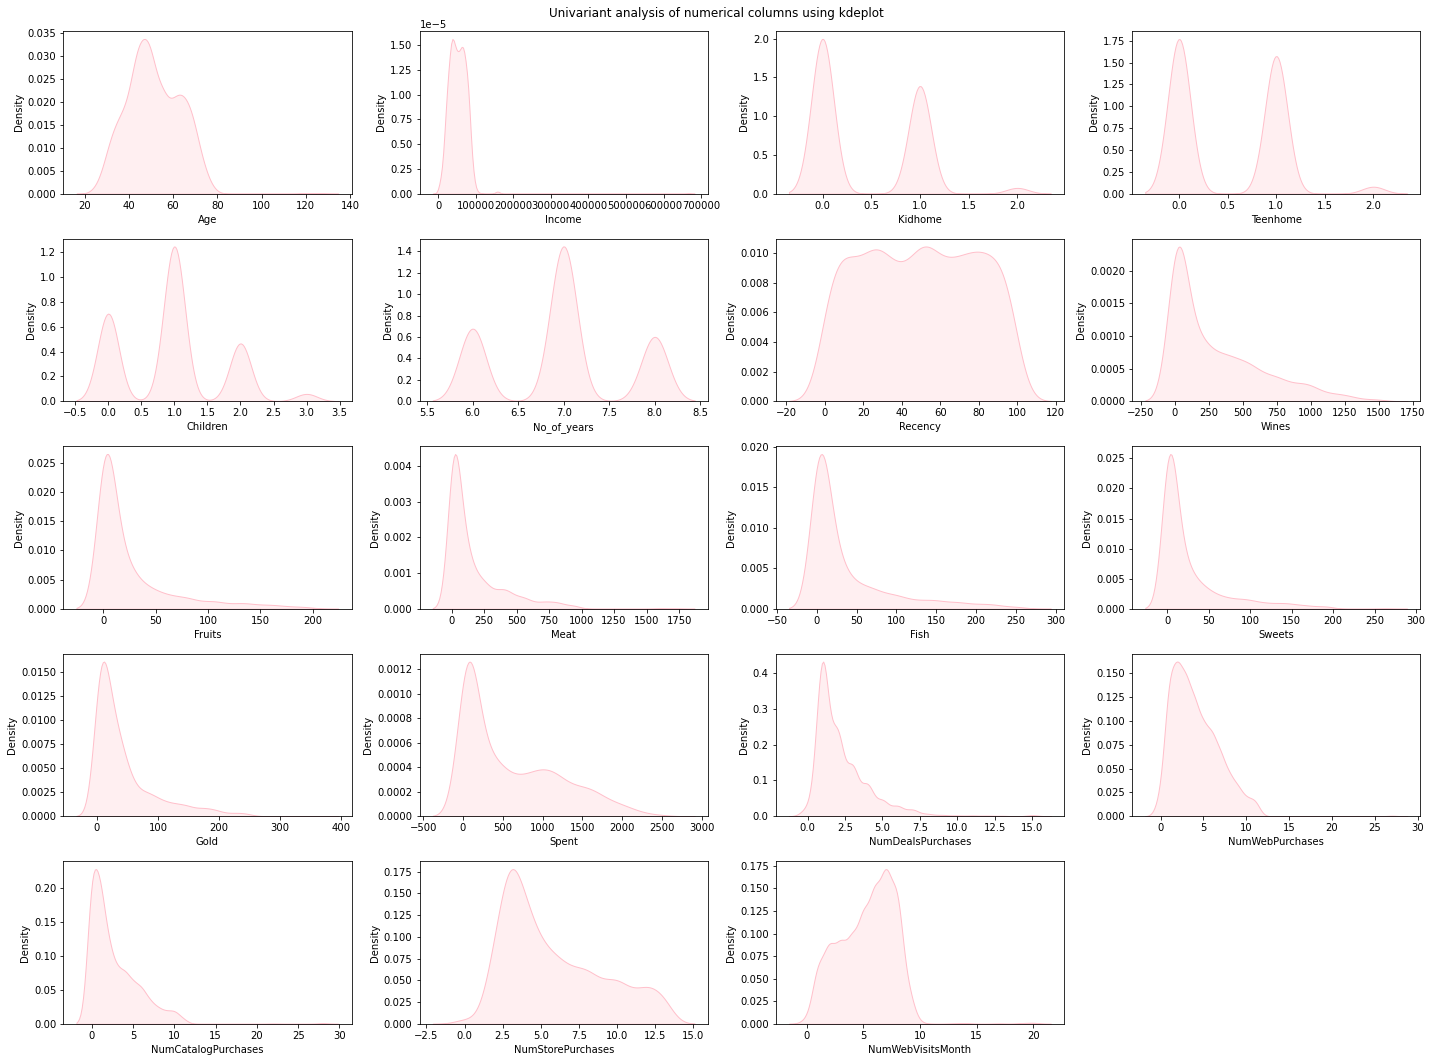

In [20]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariant analysis of numerical columns using kdeplot')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x= df[num_cols[i]], data= df, shade='True' , color= 'Pink')
    plt.tight_layout()

### OBSERVATIONS :

1. The Age group is mostly from 20 to 60 
2. All the customer income is only below 10000
3. All the customers have mostly 0 or 1 kids at their home. 2 kids were very very rare 
4. All the customers have mostly 0 or 1 Teens at their home. 2 Teens were very very rare 
5. The regular customers were from 6 to 8 years. Most customers were from year 2013. 

In [21]:
#lets visualise product wise and check the best selling product 
products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
total = []
for i in products:
    z= df[i].sum()
    total.append(z)
print(products)
print(total)

['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
[680816, 58917, 373968, 84057, 60621, 98609]


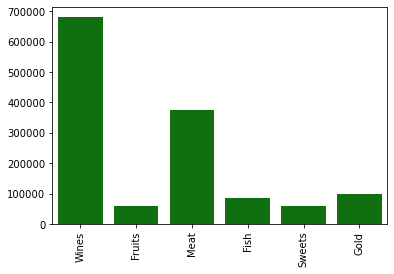

In [22]:
sns.barplot(x = products, y=total, color= 'green');
plt.xticks(rotation = 90);

### OBSERVATION :

The total amount of sales is higher in the Wines and meat sections

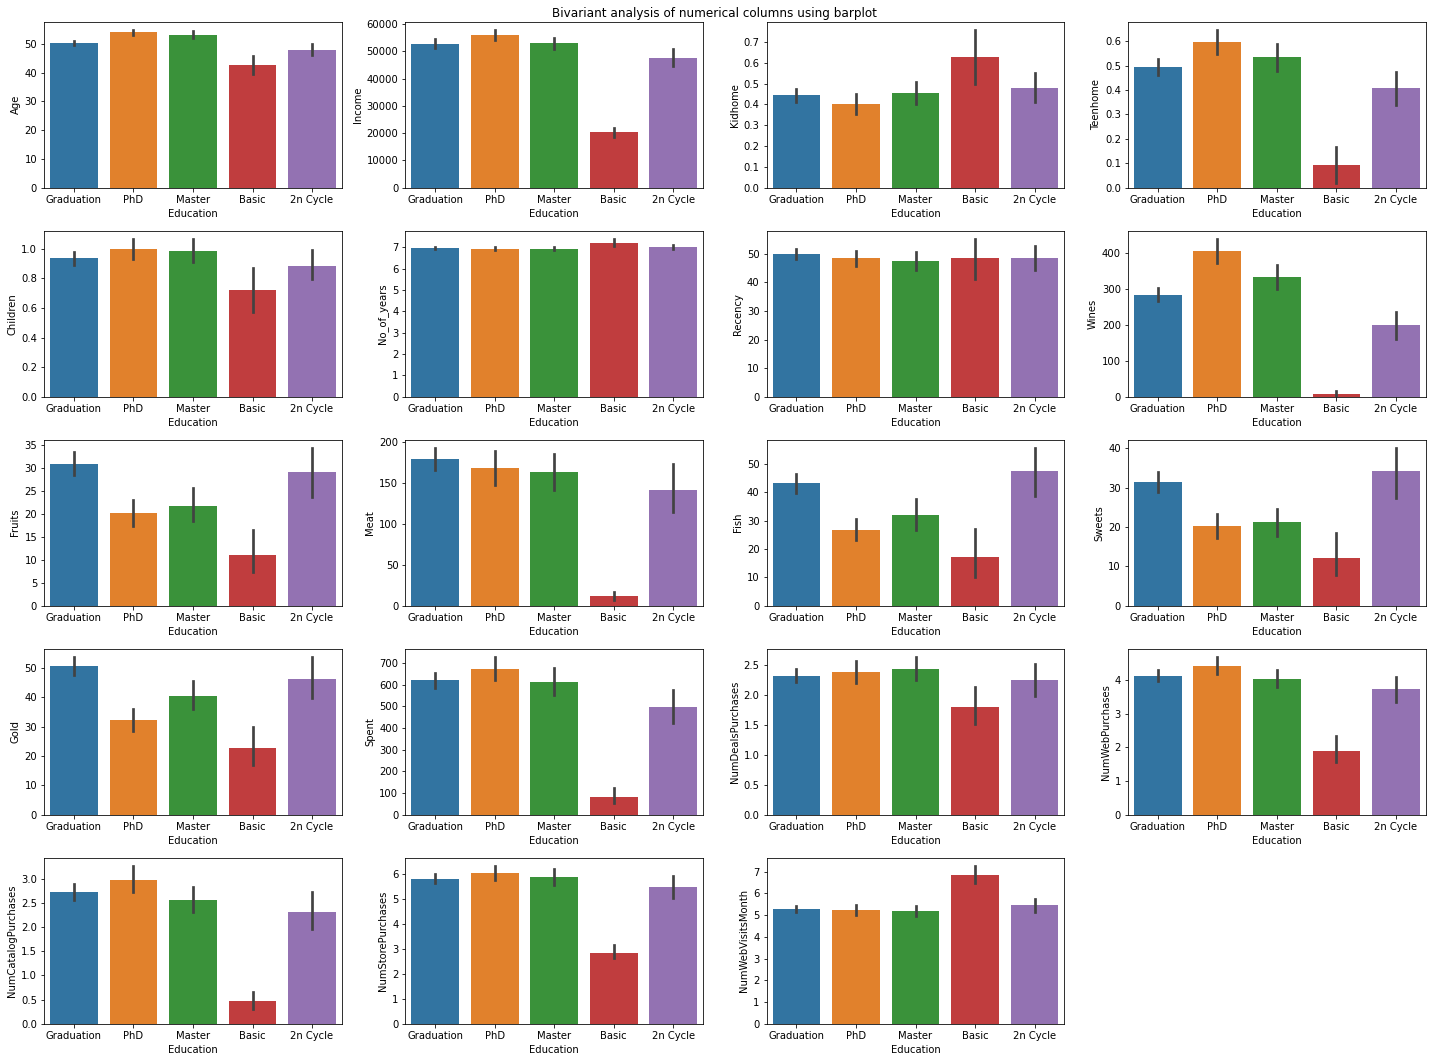

In [23]:
#Bi variance analysis of numerical column
plt.figure(figsize=(20,15))
plt.suptitle('Bivariant analysis of numerical columns using barplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.barplot(y= df[num_cols[i]], x ='Education' , data= df )
    plt.tight_layout()

### OBSERVATION

1. The Basic Educated people were not showing interest in wines and meat products but they are the ones who have highest number of visits in Websites 
2. Almost all kinds of eduacted people have same recency value. 

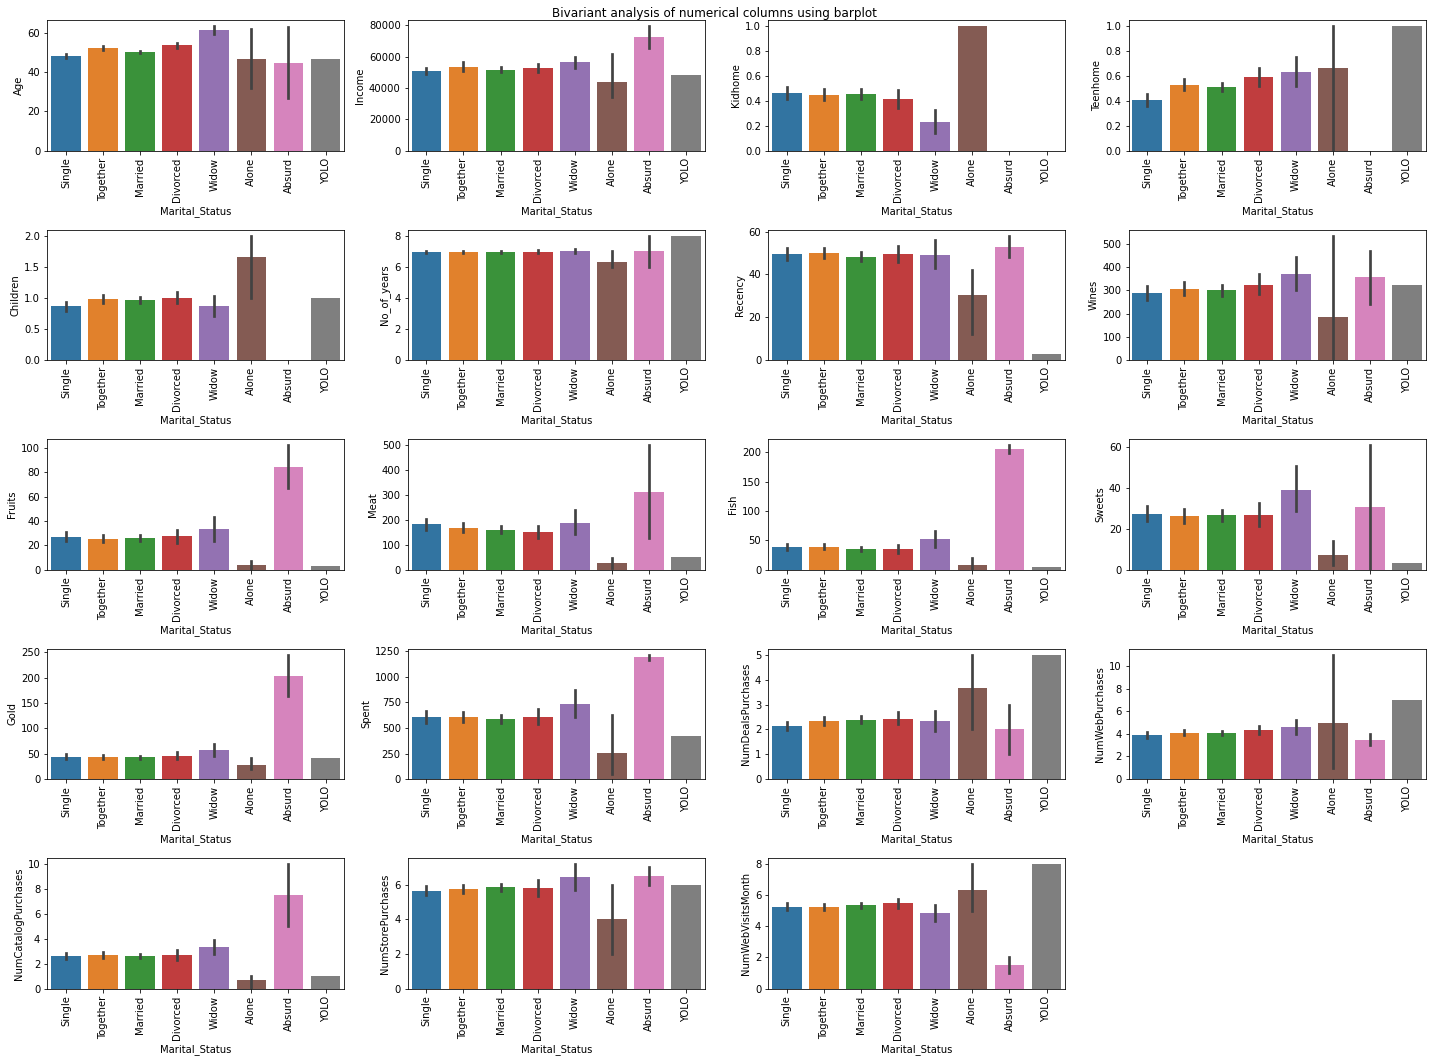

In [24]:
#Bi variance analysis of numerical column
plt.figure(figsize=(20,15))
plt.suptitle('Bivariant analysis of numerical columns using barplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.barplot(y= df[num_cols[i]], x ='Marital_Status' , data= df )
    plt.xticks(rotation = 90)
    plt.tight_layout()

### OBSERVATIONS :

1. Suprisingly the income of absurd category is higher than the other 
2. The Absurd category have high number of purchases in all products 

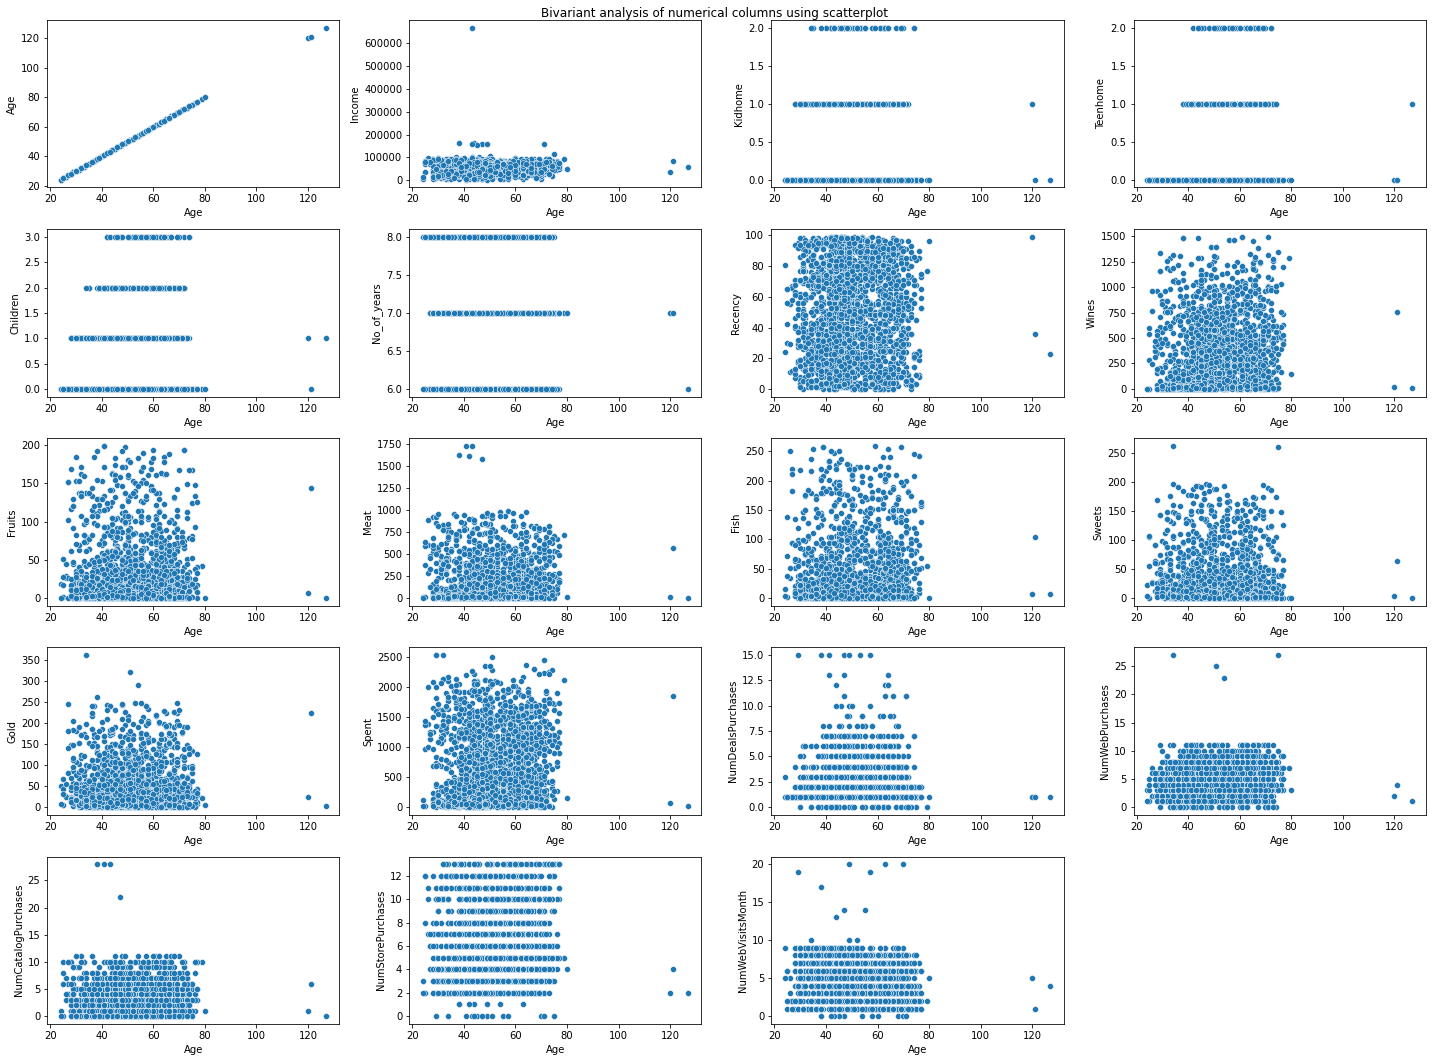

In [25]:
#Bi variance analysis of numerical column
plt.figure(figsize=(20,15))
plt.suptitle('Bivariant analysis of numerical columns using scatterplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Age' , data= df )
    plt.tight_layout()

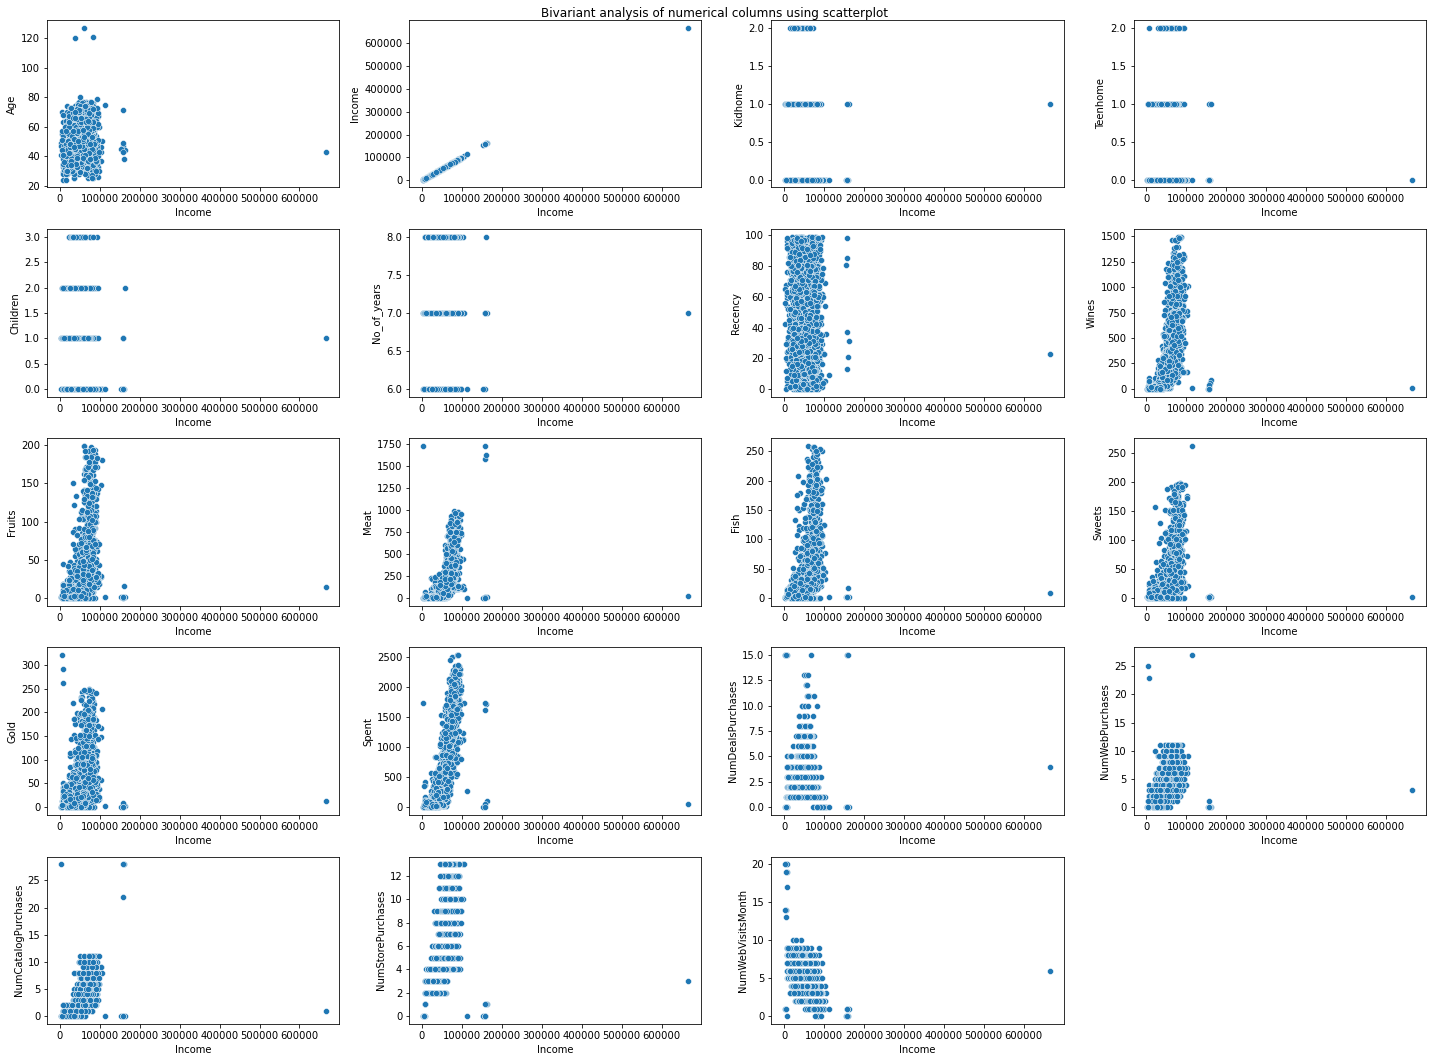

In [26]:
#Bi variance analysis of numerical column
plt.figure(figsize=(20,15))
plt.suptitle('Bivariant analysis of numerical columns using scatterplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Income' , data= df )
    plt.tight_layout()

### OBSERVATION:

1. There are many outliers in Income, Age, and in all products

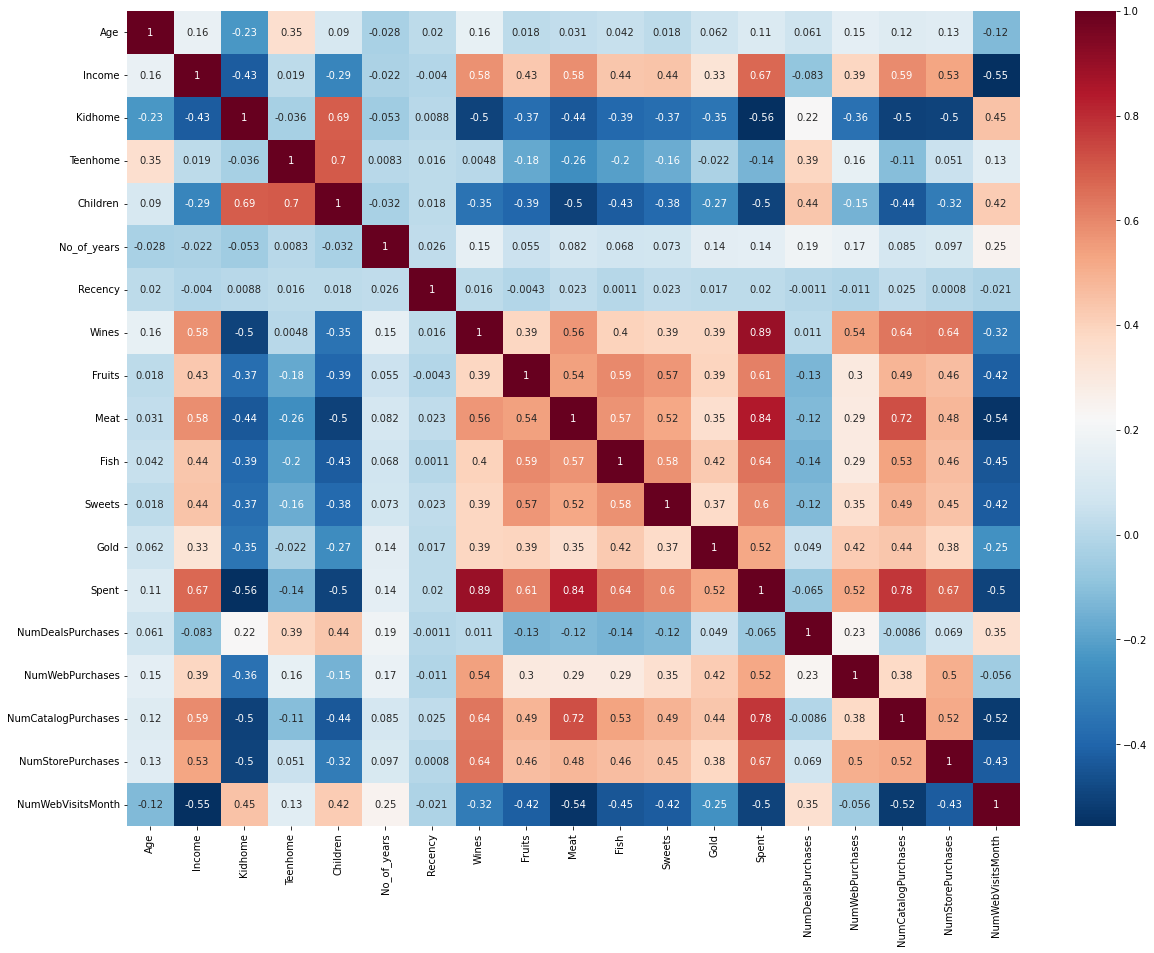

In [27]:
#Bi variance of numerical using heatmap 
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), cmap= 'RdBu_r', annot=True);

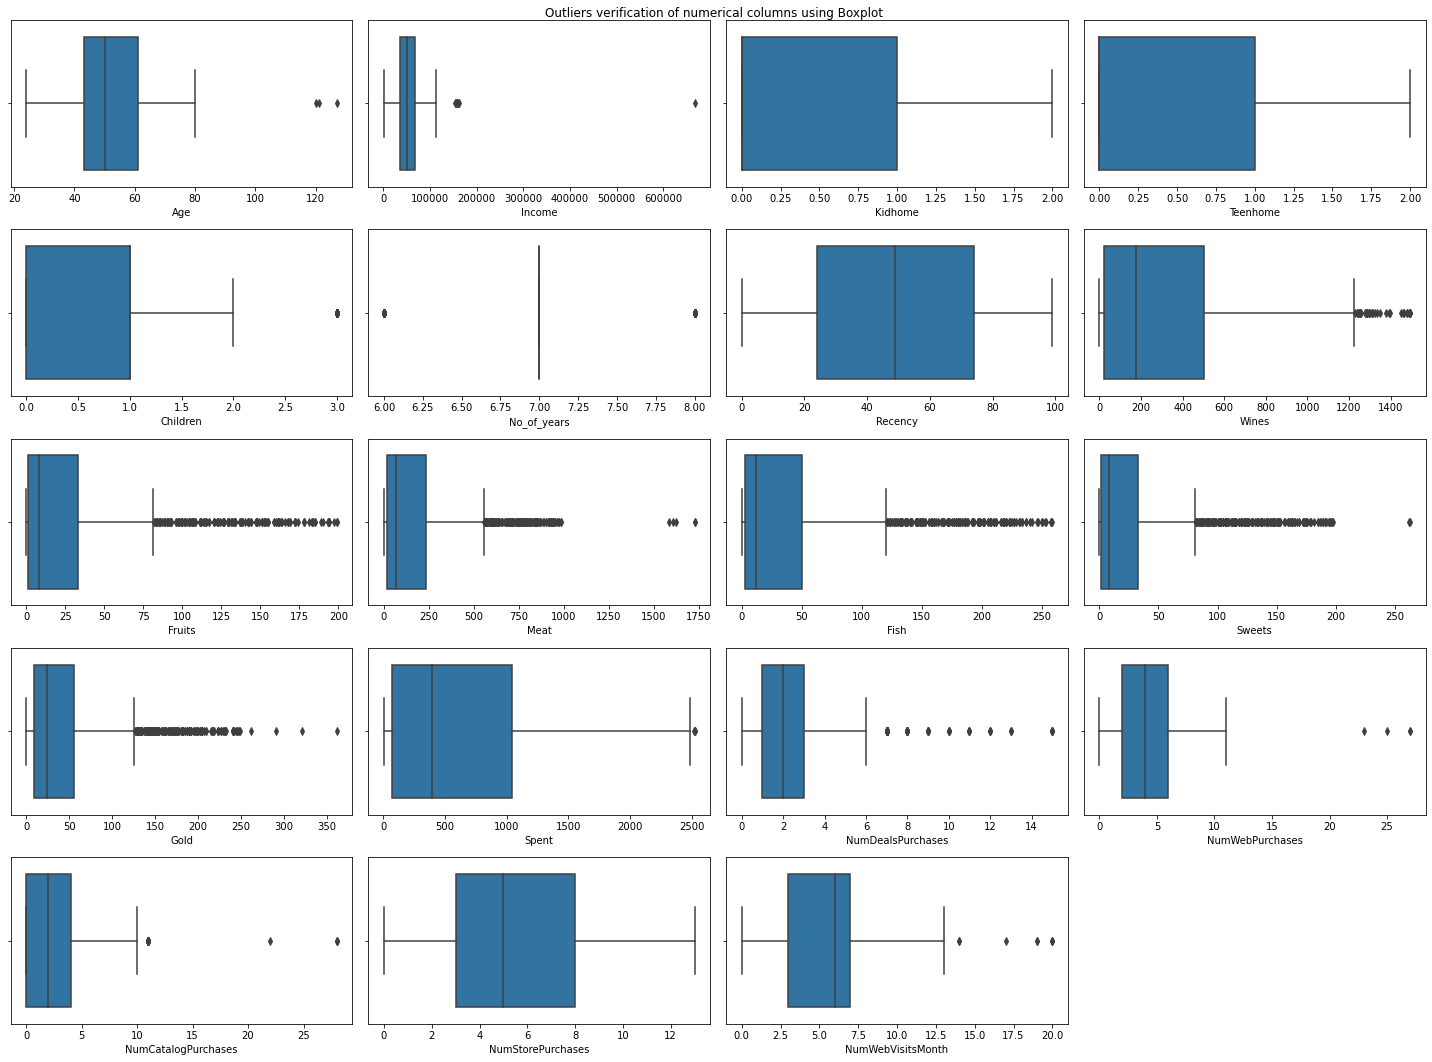

In [28]:
# Lets check for Outliers 
plt.figure(figsize=(20,15))
plt.suptitle('Outliers verification of numerical columns using Boxplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[num_cols[i]],  data= df )
    plt.tight_layout()

## OBSERVATION

As Expected, there are many outliers 

In [29]:
#Defining a function for the outliers 
def clip_outliers(df, fea):
    Q1, Q3 = np.percentile(df[fea], [25,75])
    IQR = Q3 - Q1
    ub = Q3 + (1.5 * IQR)
    lb = Q1 - (1.5 * IQR)
    df[fea] = df[fea].apply(lambda x:ub if x>ub else x)
    df[fea] = df[fea].apply(lambda x:lb if x<lb else x)

In [30]:
for i in num_cols:
    clip_outliers(df,i)

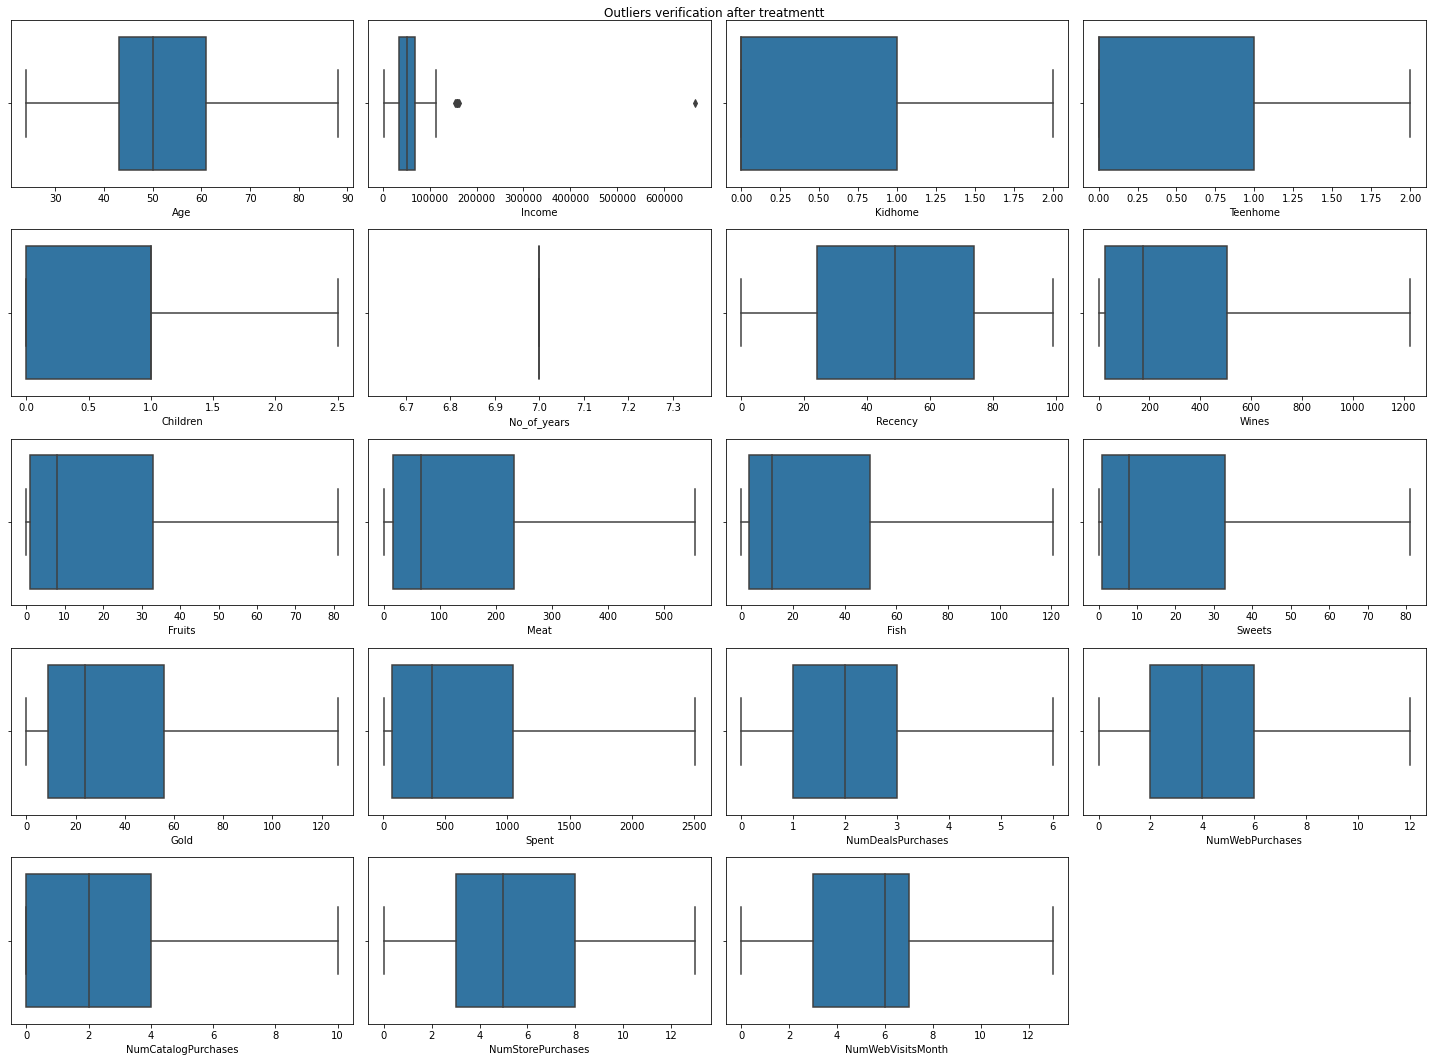

In [31]:
# Lets check for Outliers after treatmet
plt.figure(figsize=(20,15))
plt.suptitle('Outliers verification after treatmentt ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[num_cols[i]],  data= df )
    plt.tight_layout()

In [32]:
inc_out = df[df['Income'] > 100000] # Income outliers 

In [33]:
#lets drop those:
print('Before dropping :', df.shape)
df.drop(inc_out.index, axis = 0, inplace=True)
print('After dropping :', df.shape)

Before dropping : (2240, 28)
After dropping : (2227, 28)


In [34]:
## Treating Nulls 
df.isnull().sum()

Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Children                0
No_of_years             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
Spent                   0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Density'>

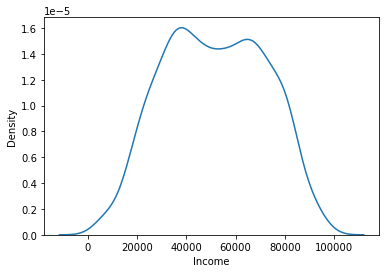

In [35]:
#Lets check the Income column distribution 
sns.kdeplot(x=df['Income'], data= df)

<AxesSubplot:xlabel='Income', ylabel='Density'>

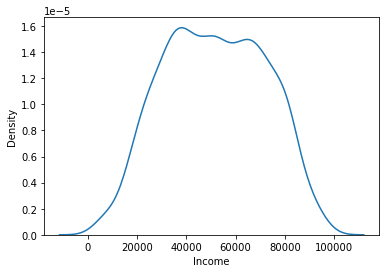

In [36]:
# Fill with median
df['Income'] = df['Income'].fillna(df['Income'].median())
sns.kdeplot(x=df['Income'], data= df)

In [37]:
# Lets check the presence of multicolliniarity
def cal_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [38]:
dt = df[num_cols]
cal_vif(dt)

variable         VIF
0                   Age    1.258609
1                Income    5.511766
2               Kidhome   58.234909
3              Teenhome   62.047251
4              Children  118.041213
5           No_of_years   74.530363
6               Recency    1.007035
7                 Wines   27.523717
8                Fruits    2.717832
9                  Meat   15.399291
10                 Fish    3.163979
11               Sweets    2.719601
12                 Gold    2.129943
13                Spent   77.775545
14    NumDealsPurchases    1.934981
15      NumWebPurchases    2.431167
16  NumCatalogPurchases    3.338482
17    NumStorePurchases    2.593749
18    NumWebVisitsMonth    2.837499

### OBSERVATION

There is multiple collinearity between the features

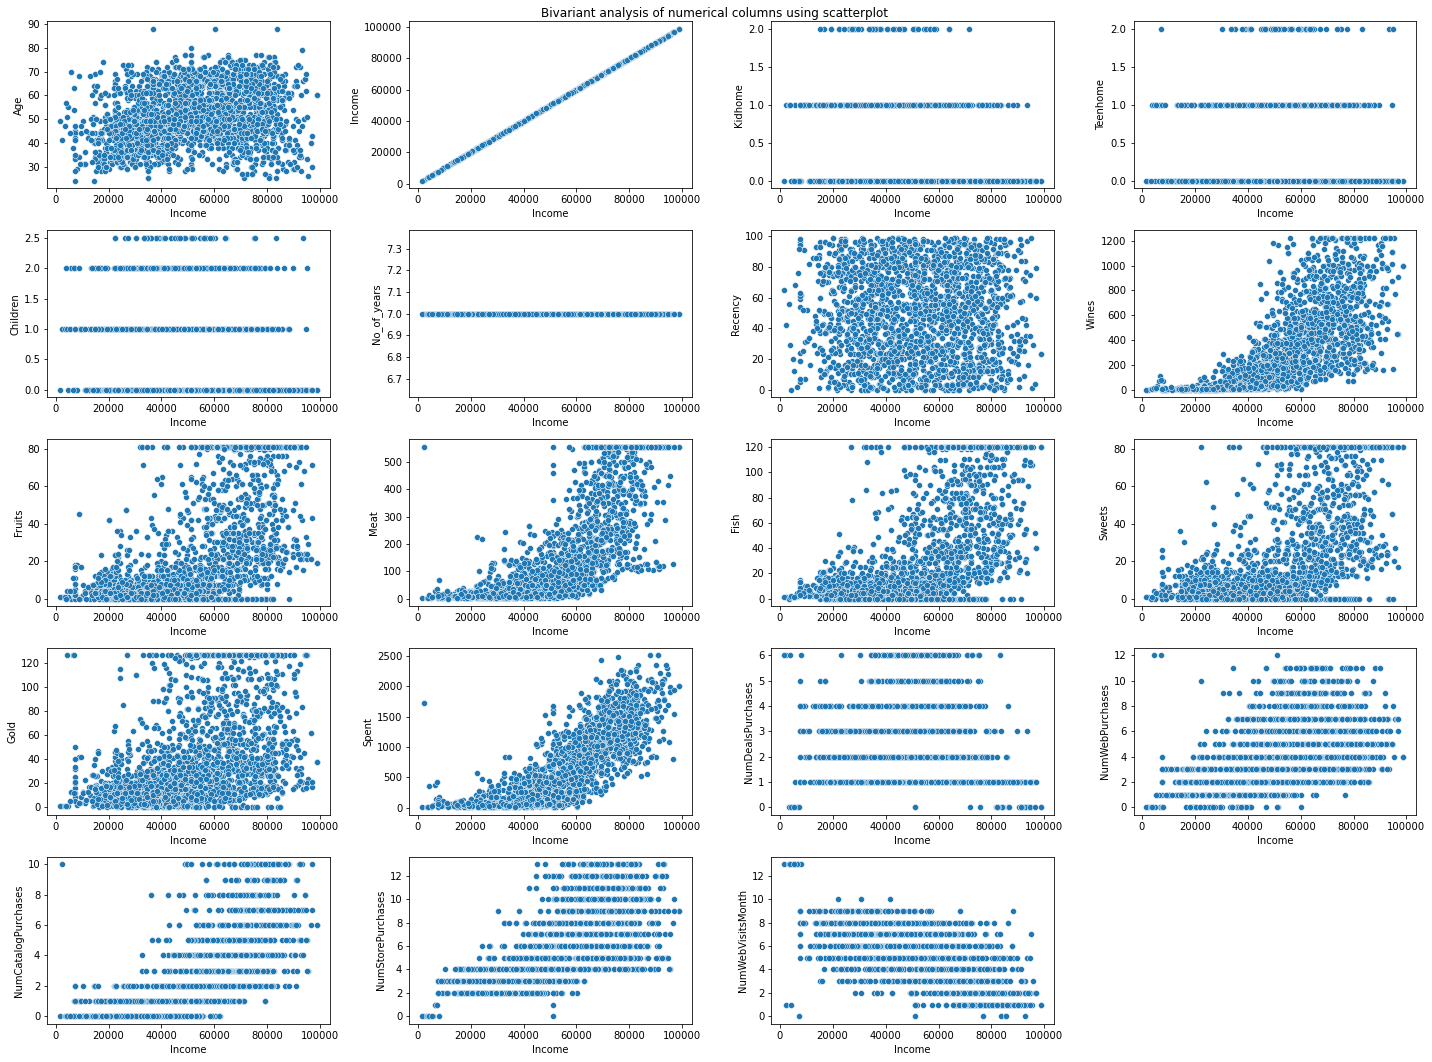

In [39]:
#Lets check once again the scatter plot
plt.figure(figsize=(20,15))
plt.suptitle('Bivariant analysis of numerical columns using scatterplot ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Income' , data= df )
    plt.tight_layout()

### OBSERVATION 

You can clearly see the relationship between the income and all the products 

## MODEL BUILDING 

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
label = ['Education', 'Marital_Status']
for i in label:
    print(df[i].value_counts())
    print('--------------------------------')

Graduation    1121
PhD            480
Master         369
2n Cycle       203
Basic           54
Name: Education, dtype: int64
--------------------------------
Married     861
Together    574
Single      478
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
--------------------------------


In [42]:
df2 = df.copy()
df2['Marital_Status'] = df2['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'] , 'Unmarried')
df2['Marital_Status'] = df2['Marital_Status'].replace('Together' , 'Married')
df2['Marital_Status'] = df2['Marital_Status'].map({'Married': 1 , 'Unmarried' : 0})
df['Marital_Status'] = df2['Marital_Status'] 
df.Marital_Status.value_counts()

1    1435
0     792
Name: Marital_Status, dtype: int64

In [43]:
Education = pd.get_dummies(df['Education'], prefix_sep='_', prefix = 'Education')
age = pd.DataFrame(df['Age'])
others = df.drop('Age', axis =1)

In [44]:
a = pd.concat([age, Education], axis =1)
b = pd.concat([a, others], axis =1)            # moving the eduacation columns at the front 
df = b.drop('Education', axis =1)
df

Age  Education_2n Cycle  Education_Basic  Education_Graduation  \
0     63.0                   0                0                     1   
1     66.0                   0                0                     1   
2     55.0                   0                0                     1   
3     36.0                   0                0                     1   
4     39.0                   0                0                     0   
...    ...                 ...              ...                   ...   
2235  53.0                   0                0                     1   
2236  74.0                   0                0                     0   
2237  39.0                   0                0                     1   
2238  64.0                   0                0                     0   
2239  66.0                   0                0                     0   

      Education_Master  Education_PhD  Marital_Status   Income  Kidhome  \
0                    0              0               0  58138.0        0   
1                    0              0               0  46344.0        1   
2                    0              0               1  71613.0        0   
3                    0              0               1  26646.0        1   
4                    0              1               1  58293.0        1   
...                ...            ...             ...      ...      ...   
2235                 0              0               1  61223.0        0   
2236                 0              1               1  64014.0        2   
2237                 0              0               0  56981.0        0   
2238                 1              0               1  69245.0        0   
2239                 0              1               1  52869.0        1   

      Teenhome  Children  No_of_years  Recency  Wines  Fruits   Meat   Fish  \
0            0       0.0          7.0       58  635.0    81.0  546.0  120.5   
1            1       2.0          7.0       38   11.0     1.0    6.0    2.0   
2            0       0.0          7.0       26  426.0    49.0  127.0  111.0   
3            0       1.0          7.0       26   11.0     4.0   20.0   10.0   
4            0       1.0          7.0       94  173.0    43.0  118.0   46.0   
...        ...       ...          ...      ...    ...     ...    ...    ...   
2235         1       1.0          7.0       46  709.0    43.0  182.0   42.0   
2236         1       2.5          7.0       56  406.0     0.0   30.0    0.0   
2237         0       0.0          7.0       91  908.0    48.0  217.0   32.0   
2238         1       1.0          7.0        8  428.0    30.0  214.0   80.0   
2239         1       2.0          7.0       40   84.0     3.0   61.0    2.0   

      Sweets   Gold   Spent  NumDealsPurchases  NumWebPurchases  \
0       81.0   88.0  1617.0                3.0              8.0   
1        1.0    6.0    27.0                2.0              1.0   
2       21.0   42.0   776.0                1.0              8.0   
3        3.0    5.0    53.0                2.0              2.0   
4       27.0   15.0   422.0                5.0              5.0   
...      ...    ...     ...                ...              ...   
2235    81.0  126.5  1341.0                2.0              9.0   
2236     0.0    8.0   444.0                6.0              8.0   
2237    12.0   24.0  1241.0                1.0              2.0   
2238    30.0   61.0   843.0                2.0              6.0   
2239     1.0   21.0   172.0                3.0              3.0   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth AcceptedCmp3  \
0                    10.0                  4                7.0            0   
1                     1.0                  2                5.0            0   
2                     2.0                 10                4.0            0   
3                     0.0                  4                6.0            0   
4                     3.0                  6                5.0            

In [45]:
std = StandardScaler()
mms = MinMaxScaler()
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns) #Standard Scaler
df_mms = pd.DataFrame(mms.fit_transform(df), columns=df.columns) #MinMax Scaler

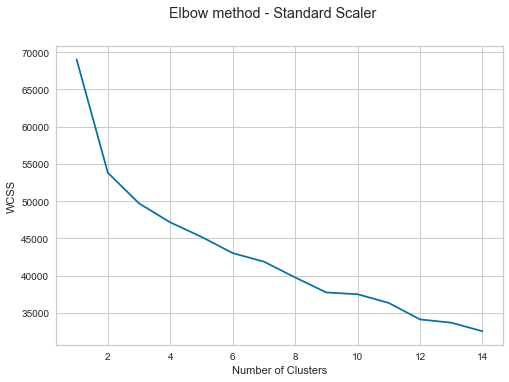

In [46]:
# Elbow method 

wss = []
for i in range(1 , 15):
    kmeans = KMeans(n_clusters= i, init='k-means++')
    kmeans.fit(df_std)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wss)
plt.suptitle('Elbow method - Standard Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

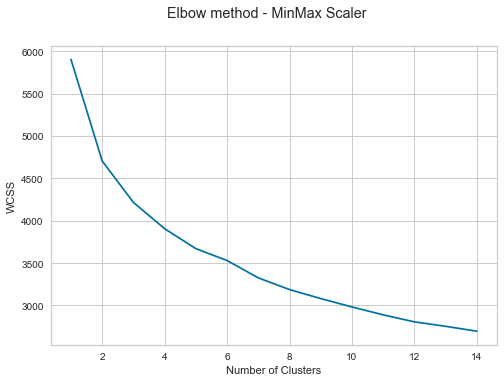

In [47]:
ees = []
for i in range(1 , 15):
    kmeans = KMeans(n_clusters= i, init='k-means++')
    kmeans.fit(df_mms)
    ees.append(kmeans.inertia_)
    
plt.plot(range(1,15), ees)
plt.suptitle('Elbow method - MinMax Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

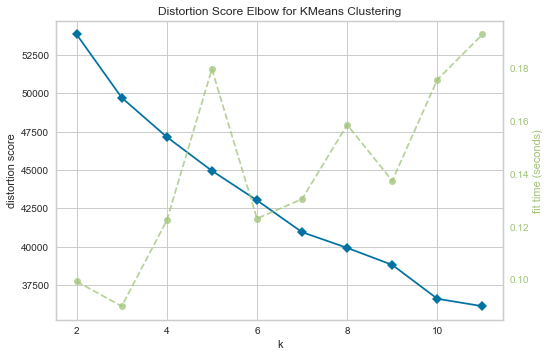

In [48]:
elbow = KElbowVisualizer(KMeans(), k=11)
elbow.fit(df_std)
elbow.show();

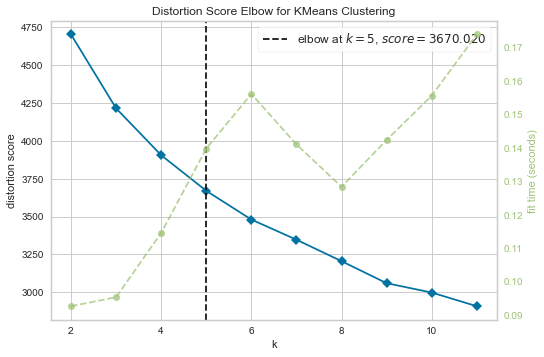

In [49]:
elbow = KElbowVisualizer(KMeans(), k=11)
elbow.fit(df_mms)
elbow.show();

In [50]:
#Lets try PCS 
from sklearn.decomposition import PCA
pca = PCA(0.95)

pca.fit_transform(df_std)
pca.fit_transform(df_mms)

array([[ 1.73825126e+00, -4.55669559e-01,  7.42089521e-01, ...,
        -9.99926515e-02,  2.40801617e-01,  4.76875830e-01],
       [-8.19517743e-01, -6.10545698e-01,  6.37322129e-01, ...,
        -4.58584356e-04,  6.78408749e-02,  1.37637670e-01],
       [ 6.68611364e-01, -5.44687171e-01, -3.95488515e-01, ...,
        -3.67694155e-01, -3.69308657e-01, -1.11958528e-01],
       ...,
       [ 6.16700224e-01, -4.53603334e-01,  5.85249608e-01, ...,
         1.69889885e-01, -4.86923449e-02, -2.81316484e-01],
       [ 4.77055208e-01,  5.46660526e-01, -5.26633714e-01, ...,
        -1.03463170e-01, -6.21740563e-02, -8.23898825e-02],
       [-6.75450528e-01,  7.83382274e-01, -8.66769851e-02, ...,
         4.48539552e-02, -4.15675773e-04, -8.38367774e-03]])

In [51]:
pca_df_std = pd.DataFrame(pca.fit_transform(df_std))
pca_df_mms = pd.DataFrame(pca.fit_transform(df_mms))

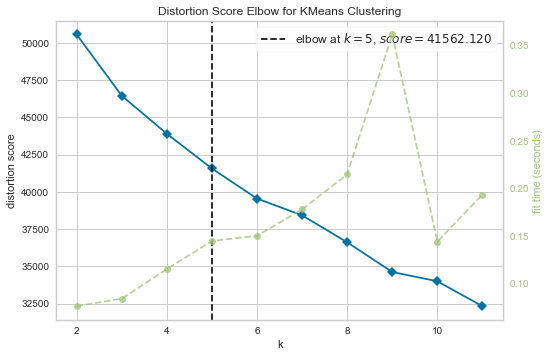

In [52]:
#Lets check with PCA dfs
elbow = KElbowVisualizer(KMeans(), k=11)
elbow.fit(pca_df_std)
elbow.show();

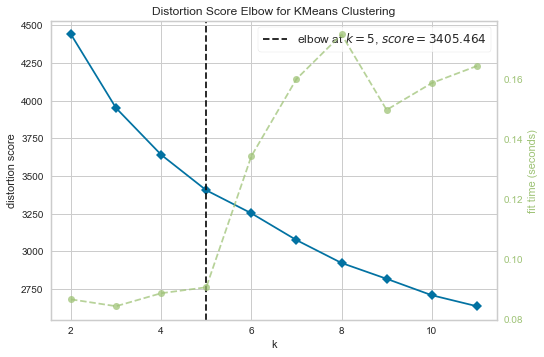

In [53]:
elbow = KElbowVisualizer(KMeans(), k=11)
elbow.fit(pca_df_mms)
elbow.show();

## OBSERVATION 

So the optimal cluster is either 5 or 6 

In [54]:
#Initiating the KMeans Clustering model 
KM = KMeans(n_clusters=5)
# fit model and predict clusters
Cluster_number = KM.fit_predict(pca_df_mms)
pca_df_mms["Clusters"] = Cluster_number
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= Cluster_number

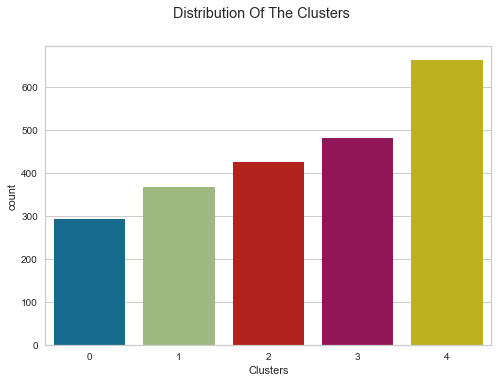

In [55]:
sns.countplot(x=df["Clusters"])
plt.suptitle("Distribution Of The Clusters")
plt.show()

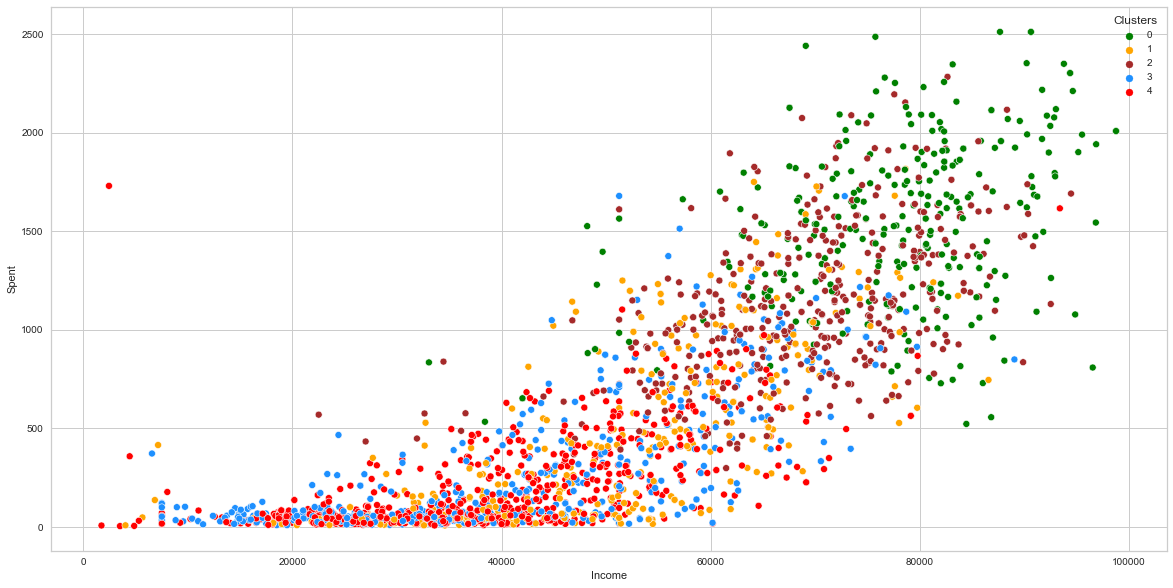

In [82]:
#Lets see the sctter plot with hue to check the clusters
plt.figure(figsize=(20,10))
sns.color_palette("rocket")
sns.scatterplot(data = df ,y=df["Spent"], x=df["Income"],hue=df["Clusters"], palette=['green','orange','brown','dodgerblue', 'red'] );

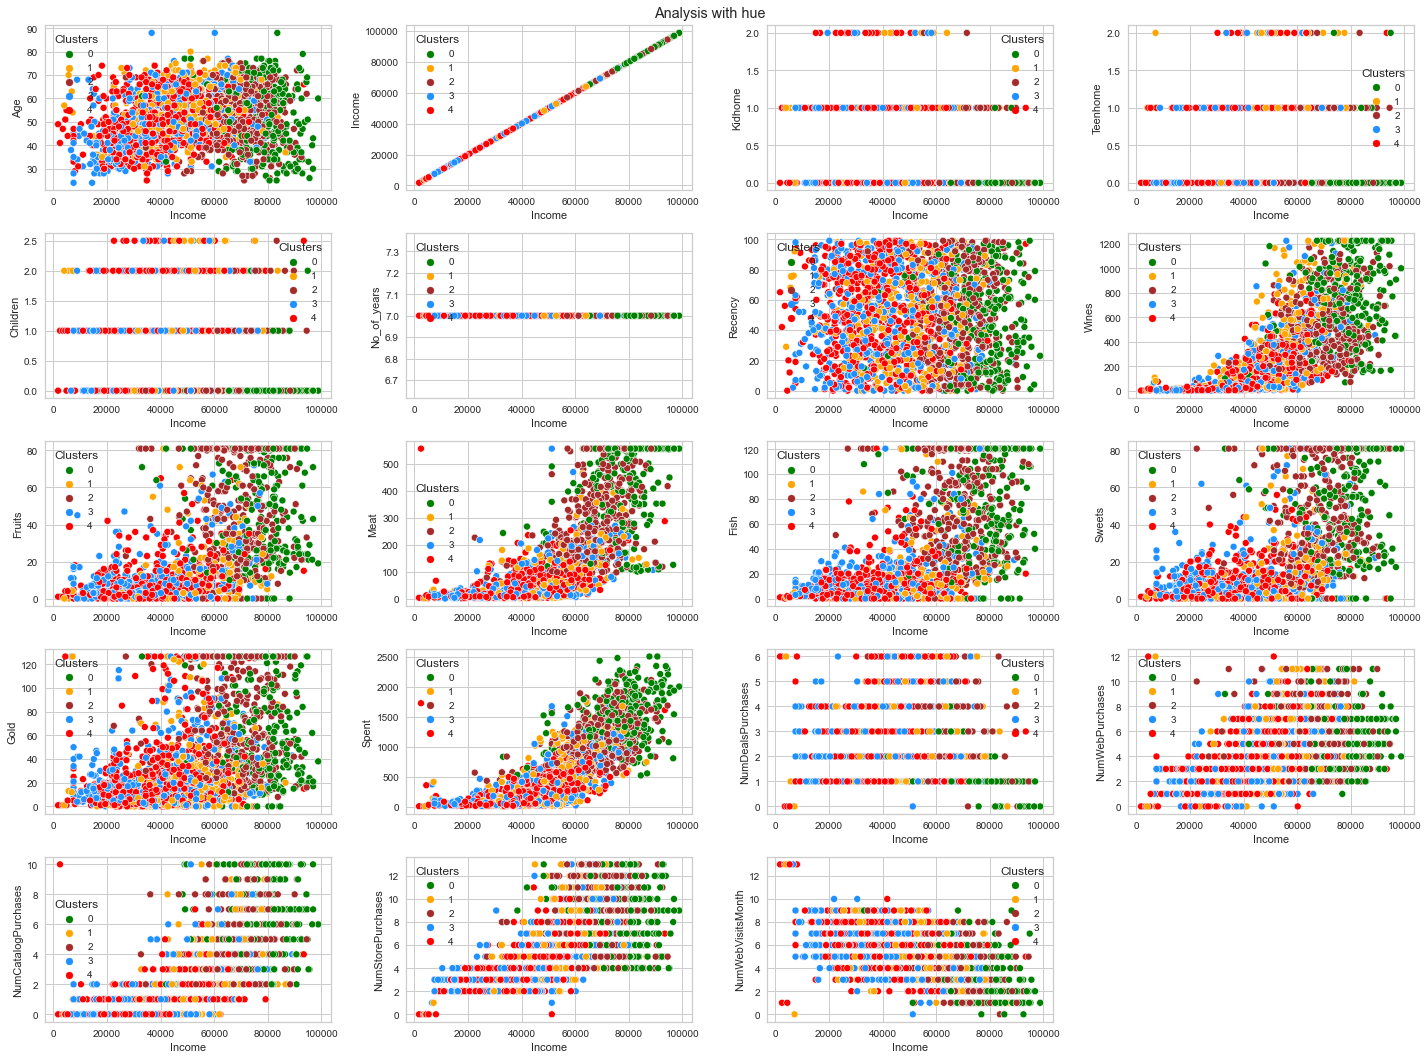

In [57]:
#Lets check once again the scatter plot
plt.figure(figsize=(20,15))
plt.suptitle('Analysis with hue  ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Income' , data= df, hue= df['Clusters'], palette=['green','orange','brown','dodgerblue', 'red'] )
    plt.tight_layout()

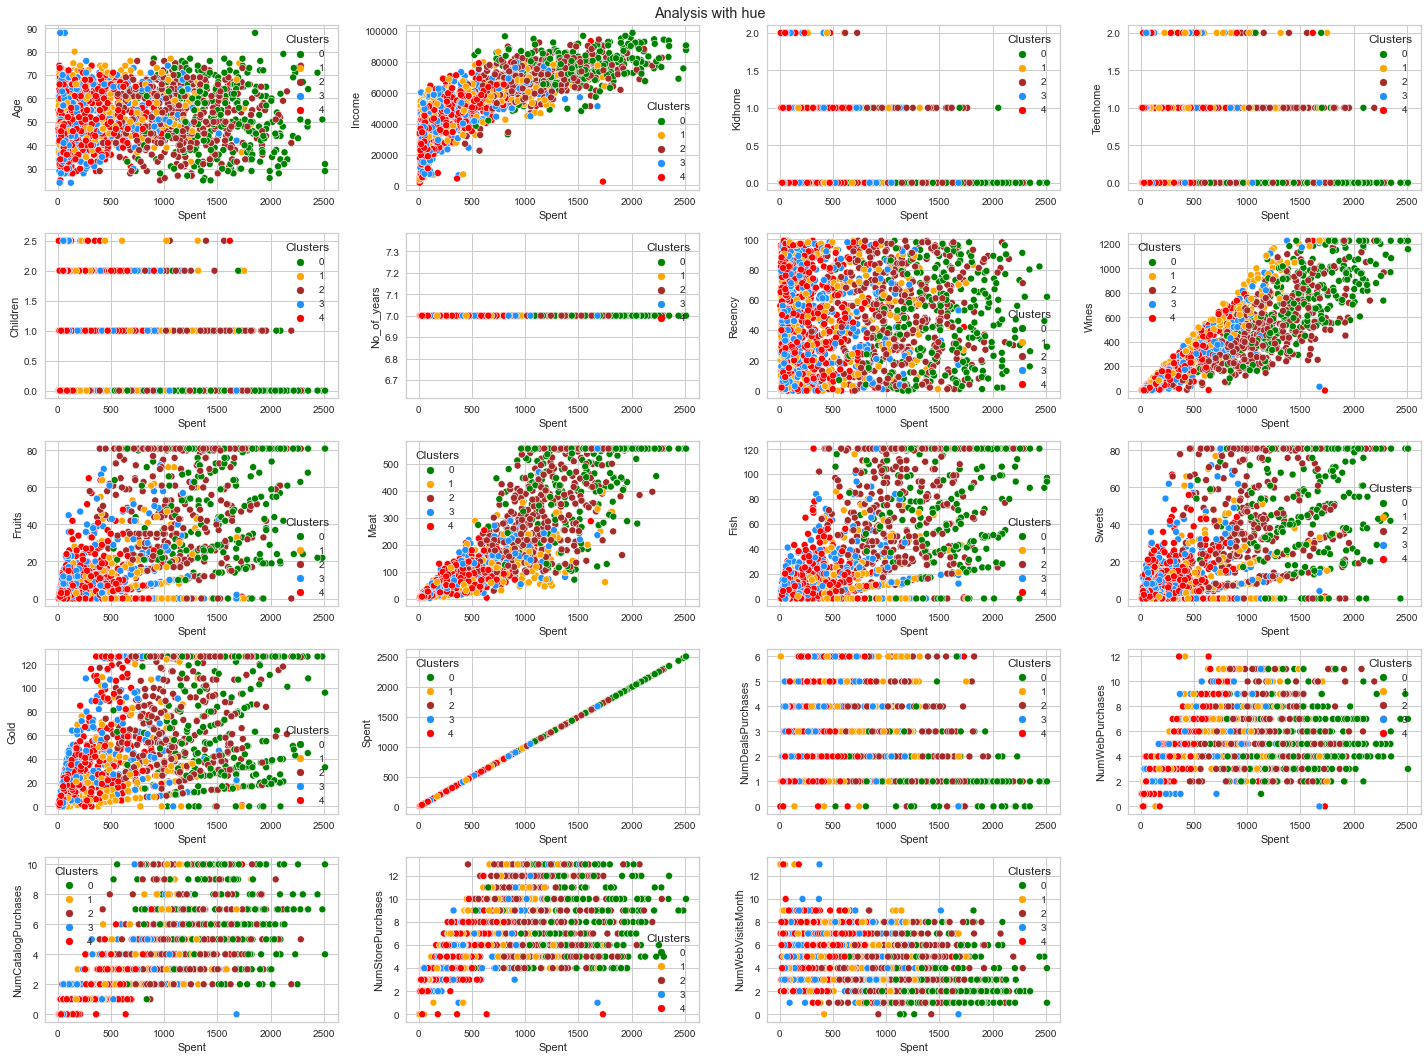

In [84]:
#Lets check once again the scatter plot
plt.figure(figsize=(20,15))
plt.suptitle('Analysis with hue  ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Spent' , data= df, hue= df['Clusters'], palette=['green','orange','brown','dodgerblue', 'red'] )
    plt.tight_layout()

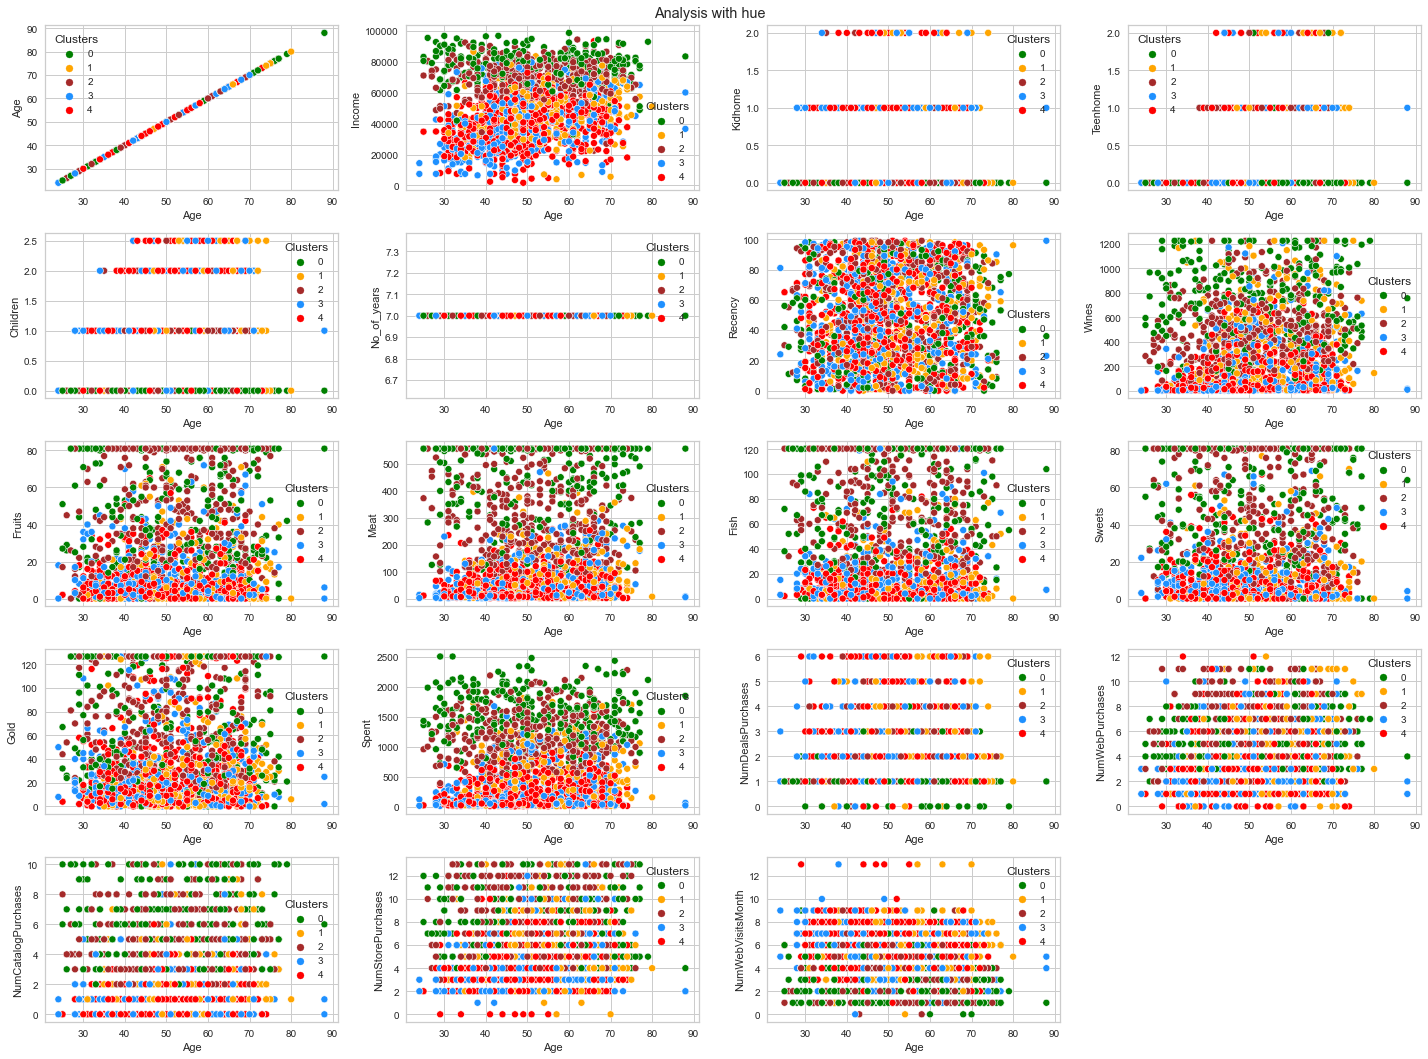

In [58]:
#Lets check once again the scatter plot
plt.figure(figsize=(20,15))
plt.suptitle('Analysis with hue  ')
for i in range(0 , len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(y= df[num_cols[i]], x ='Age' , data= df, hue= df['Clusters'], palette=['green','orange','brown','dodgerblue', 'red'] )
    plt.tight_layout()

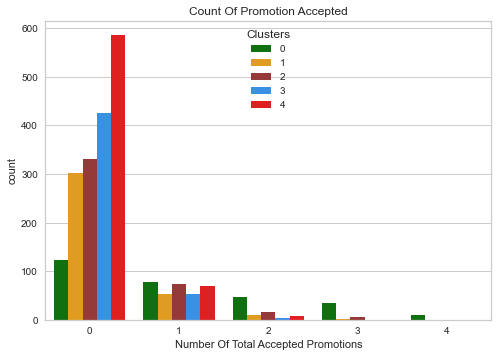

In [59]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= ['green','orange','brown','dodgerblue', 'red'])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

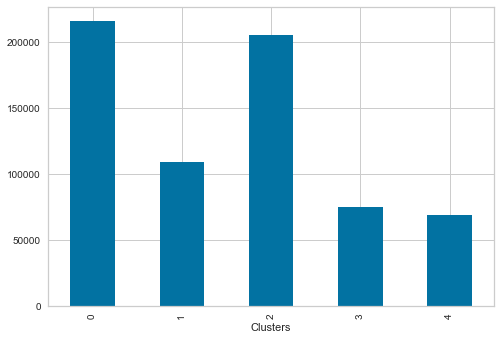

In [76]:
pd_df = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Clusters']]
pd_df.groupby('Clusters')['Wines'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Clusters'>

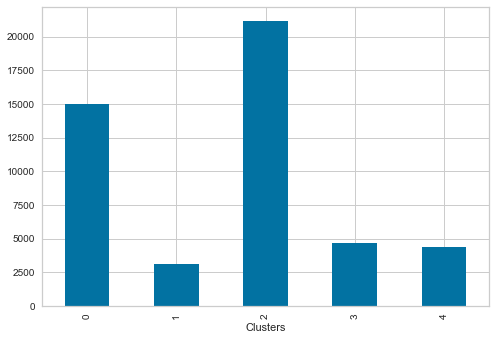

In [77]:
pd_df.groupby('Clusters')['Fruits'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Clusters'>

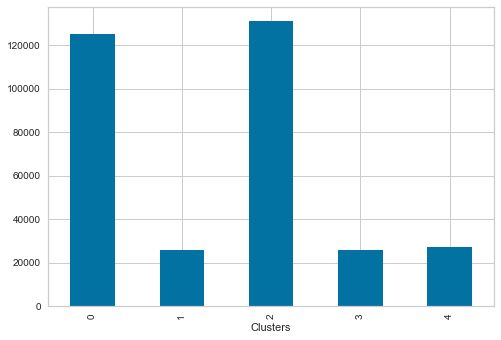

In [78]:
pd_df.groupby('Clusters')['Meat'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Clusters'>

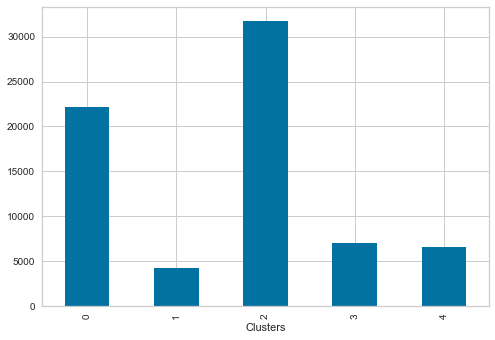

In [79]:
pd_df.groupby('Clusters')['Fish'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Clusters'>

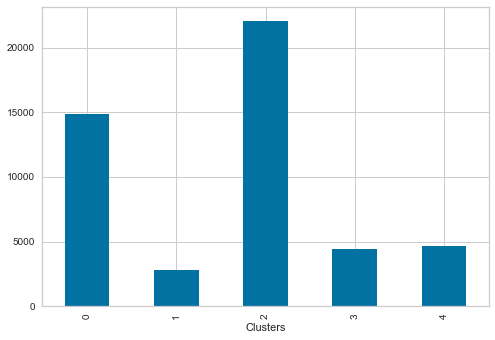

In [80]:
pd_df.groupby('Clusters')['Sweets'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Clusters'>

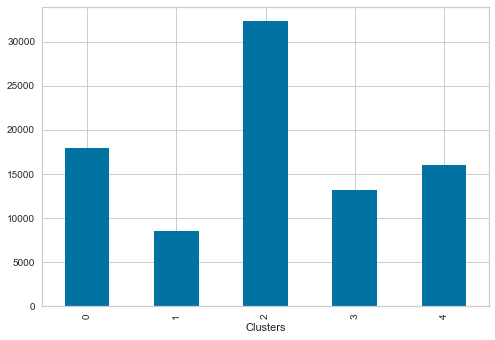

In [81]:
pd_df.groupby('Clusters')['Gold'].sum().plot(kind = 'bar')

## CONCLUSIONS